# Alpha Shapes with GeoPandas

## Sample Data

The data used in this notebook can be obtained from the Alaska Department of Transportation and Public Facilities website at the link below.  It consists of a point collection for each of the public airports in Alaska.

[http://www.dot.alaska.gov/stwdplng/mapping/shapefiles.shtml](http://www.dot.alaska.gov/stwdplng/mapping/shapefiles.shtml)

## Load the Shapefile

In [1]:
import os
import geopandas
data = os.path.join(os.getcwd(), 'data', 'Public_Airports_March2018.shp')
gdf = geopandas.read_file(data)
gdf

,OBJECTID,NAME,OWNER,ID,STATUS,REGION,LAT_DD,LONG_DD,FAA_ID,geometry
0,1,Adak Apt,DOT&PF Controlled,1.0,Standard,Southcoast,51.877964,-176.646031,ADK,POINT (-1537216.266967773 472136.9321899414)
1,2,Atka Apt,DOT&PF Controlled,2.0,Standard,Southcoast,52.220586,-174.206183,AKA,POINT (-1365699.974365234 454797.7560424805)
2,5,Unalaska / Dutch Harbor Apt,DOT&PF Controlled,5.0,Standard,Southcoast,53.900139,-166.543500,DUT,POINT (-820915.3084716797 509535.6334228516)
3,6,Saint Paul Island Apt,DOT&PF Controlled,6.0,Standard,Southcoast,57.166294,-170.222553,SNP,POINT (-969444.8947753906 914620.5076293945)
4,7,Saint George Apt,DOT&PF Controlled,7.0,Standard,Southcoast,56.577353,-169.663736,PBV,POINT (-952041.1657714844 842699.1453857422)
5,8,Nelson Lagoon Apt,DOT&PF Controlled,8.0,Standard,Southcoast,56.007536,-161.160367,OUL,POINT (-445255.7288818359 690383.2276000977)
6,9,Sand Point Apt,DOT&PF Controlled,9.0,Standard,Southcoast,55.313694,-160.521417,SDP,POINT (-413237.4985961914 609349.1594238281)
7,10,King Cove Apt,DOT&PF Controlled,10.0,Standard,Southcoast,55.116348,-162.266227,KVC,POINT (-526016.985168457 599846.2341918945)
8,11,Cold Bay Apt,DOT&PF Controlled,11.0,Standard,Southcoast,55.205150,-162.724466,CDB,POINT (-553718.0031738281 613378.7695922852)
9,12,False Pass Apt,DOT&PF Controlled,12.0,SubStandard,Southcoast,54.847446,-163.410322,KFP,POINT (-602590.3037719727 579897.3408203125)


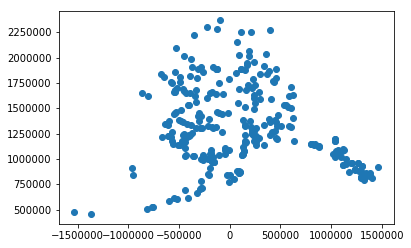

In [2]:
%matplotlib inline
gdf.plot()

In [3]:
gdf.crs

{'init': 'epsg:3338'}

## Generate Alpha Shape
The alpha shape will be generated in the coordinate frame the geodataframe is in.  In this example, we will project into an Albers Equal Area projection, construct our alpha shape in that coordinate system, and then convert back to the source projection.

### Project to Albers Equal Area Spatial Reference

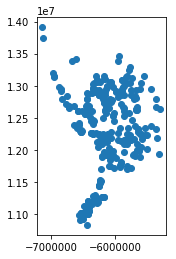

In [4]:
import cartopy.crs as ccrs
gdf_proj = gdf.to_crs(ccrs.AlbersEqualArea().proj4_init)
gdf_proj.plot()

### Determine the Alpha Shape

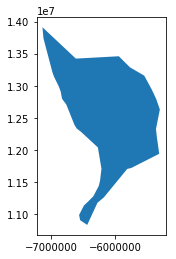

In [5]:
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))
import alphashape
alpha_shape = alphashape.alphashape(gdf_proj)
alpha_shape.plot()

### Plotting the Alpha Shape over the Data Points
#### Plate Carree Projection

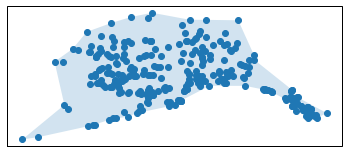

In [6]:
import matplotlib.pyplot as plt
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter([p.x for p in gdf_proj['geometry']],
           [p.y for p in gdf_proj['geometry']],
           transform=ccrs.AlbersEqualArea())
ax.add_geometries(
    alpha_shape['geometry'],
    crs=ccrs.AlbersEqualArea(), alpha=.2)
plt.show()

#### Robinson Projection

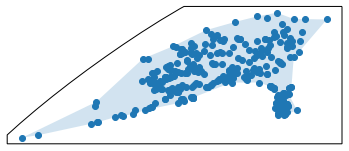

In [7]:
import matplotlib.pyplot as plt
ax = plt.axes(projection=ccrs.Robinson())
ax.scatter([p.x for p in gdf_proj['geometry']],
           [p.y for p in gdf_proj['geometry']],
           transform=ccrs.AlbersEqualArea())
ax.add_geometries(
    alpha_shape['geometry'],
    crs=ccrs.AlbersEqualArea(), alpha=.2)
plt.show()